In [1]:
# test_evaluate_brisque_scores
# test_brisque_scores takes hours to run...this script evaluates the results

import pandas as pd
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('brisque_scores.csv',header=None,sep=',')
df.columns = ['fpath','bs']

In [11]:
df2 = pd.read_csv('brisque_scores_small.csv',header=None,sep=',')
df2.columns = ['fpath','bs']
df['bs_s']=df2['bs']
df.describe()

,bs,bs_s
count,302.000000,302.000000
mean,57.186202,32.325765
std,14.323033,18.396434
min,35.264000,6.118000
25%,46.379000,20.144250
50%,52.651000,25.435500
75%,64.844250,40.339250
max,105.052000,94.781000


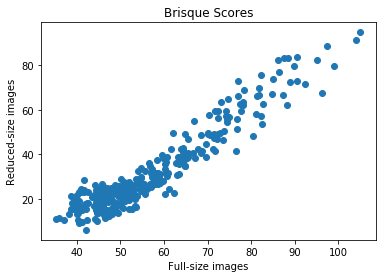

In [33]:
plt.scatter(df['bs'].values,df['bs_s'].values)
plt.xlabel('Full-size images')
plt.ylabel('Reduced-size images')
_ = plt.title('Brisque Scores')

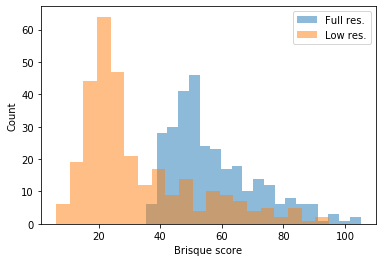

In [67]:
plt.hist(df['bs'].values,bins=20,alpha=.5,label='Full res.')
plt.hist(df['bs_s'].values,bins=20,alpha=.5,label='Low res.')
plt.xlabel('Brisque score')
plt.ylabel('Count')
plt.legend()

In [81]:
dfr = df.sample(16)
dfr.describe()

,bs,bs_s
count,16.00000,16.000000
mean,57.46825,32.250250
std,13.90709,19.634403
min,40.26100,9.402000
25%,51.35125,21.352750
50%,53.99400,26.539000
75%,59.73400,36.903000
max,97.44500,88.556000


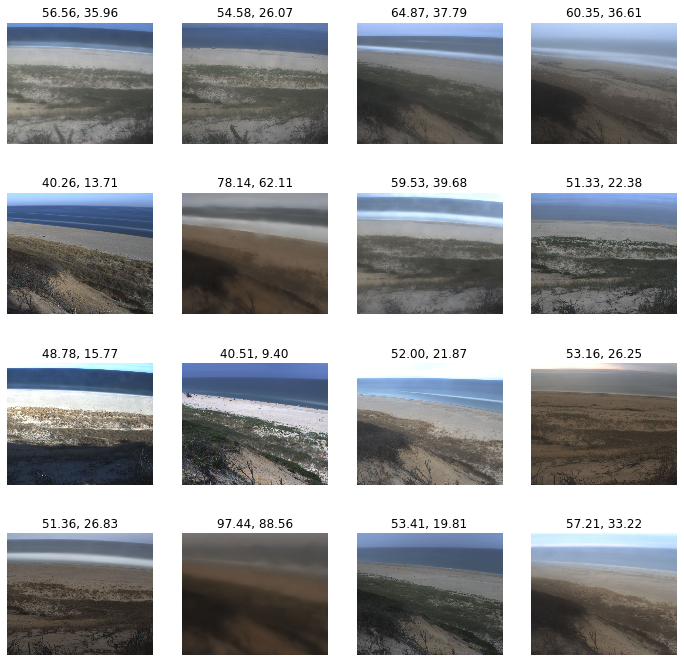

<Figure size 432x288 with 0 Axes>

In [94]:
fig = plt.figure(figsize=(12,12))
idx = 1
for index, row in dfr.iterrows():
    #print(row['fpath'],row['bs'])
    img = plt.imread(row['fpath'])
    plt.subplot(4,4,idx)
    plt.imshow(img)
    plt.axis('off')
    plt.title('{:.2f}, {:.2f}'.format(row['bs'],row['bs_s']))
    idx = idx+1
    
plt.show()
plt.savefig('brisque_images.pdf')

In [56]:
df.loc[df['bs'] == df['bs'].min()]['fpath']

152    C:\crs\proj\2019_CACO_CoastCam\random_obliques...
Name: fpath, dtype: object

In [57]:
df['fpath'][152]

'C:\\crs\\proj\\2019_CACO_CoastCam\\random_obliques\\1594724401.c1.timex.jpg'

In [58]:
df.loc[df['bs'] == df['bs'].max()]['fpath']

208    C:\crs\proj\2019_CACO_CoastCam\random_obliques...
Name: fpath, dtype: object

In [59]:
df['fpath'][208]

'C:\\crs\\proj\\2019_CACO_CoastCam\\random_obliques\\1600606801.c1.timex.jpg'

In [60]:
df.loc[df['bs'] == df['bs'].quantile(0.25)]['fpath']

Series([], Name: fpath, dtype: object)